## AIRLINE PASSENGER BOOKING ANALYSIS USING PYTHON

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

C:\Users\tarun\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### ABOUT THE DATA

In [2]:
df = pd.read_csv("customer_booking.csv", encoding='latin-1')

In [3]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.shape # Tells number of columns and rows in the given data 

(50000, 14)

In [5]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [6]:
df.dtypes # Tells Datatype of each column

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [7]:
df.nunique() # Gives number of unique values in each column

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [9]:
df.describe().style.background_gradient(cmap='bone_r')

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.044560,9.066340,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.887670,5.412660,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [10]:
duplicate_values = df.duplicated().sum()
print(f"The data contains {duplicate_values} duplicate values")

The data contains 719 duplicate values


In [11]:
data = df.drop_duplicates()
data.shape # Gives refined data after removing the duplicate records

(49281, 14)

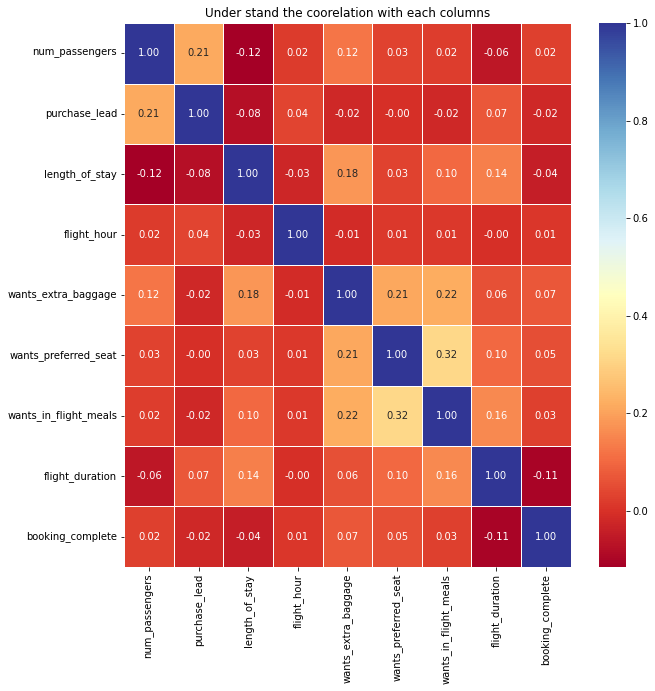

In [12]:
# Visualize the correlation map

plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot=True, cmap= 'RdYlBu', fmt= '.2f', annot_kws = None, linewidth=1,)
plt.title("Under stand the coorelation with each columns")
plt.show()

### EDA - Exploratory Data Analysis

In [13]:
data['flight_day'].value_counts().sort_values(ascending=False)
# This Shows Monday is busiest day and Saturday is not so busiest

Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: flight_day, dtype: int64

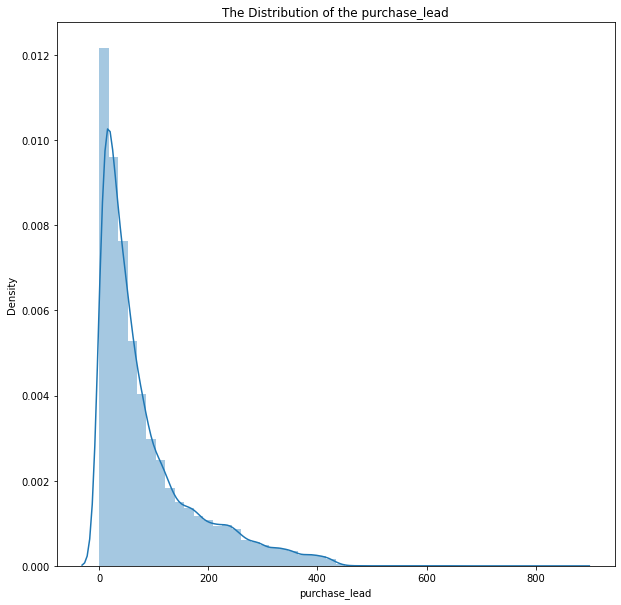

In [14]:
# Histogram to understand the distribution of purchase_lead

plt.figure(figsize=(10,10))
sns.distplot(data['purchase_lead'], hist = True, bins=50)
plt.title('The Distribution of the purchase_lead')
plt.show()

Text(0, 0.5, 'Value in count')

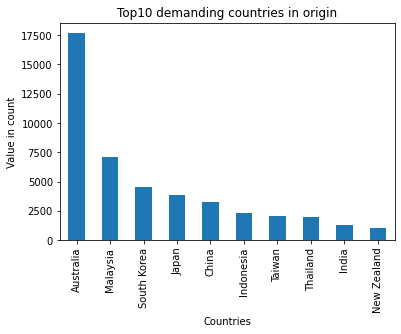

In [15]:
# Barplot to visualize the top 10 most demanding origins to travel

data['booking_origin'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind = 'bar')
plt.title("Top10 demanding countries in origin")
plt.xlabel("Countries")
plt.ylabel("Value in count")

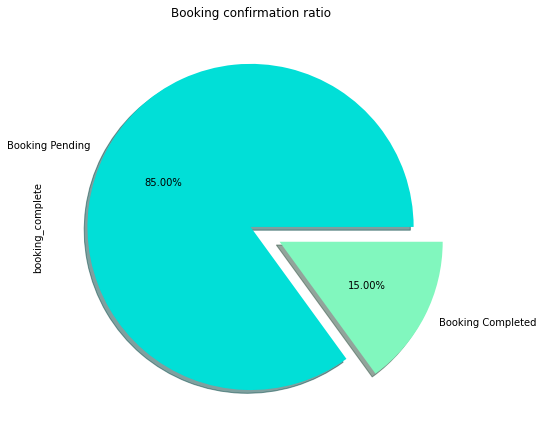

In [16]:
# Pie chart to visualise percentage of completion of there bookings

plt.figure(figsize=(7.5,7.5))
data['booking_complete'].value_counts().plot(kind='pie', explode=[0,0.2], labels = ['Booking Pending', "Booking Completed"], 
                                             colors = ["#01dfd7", '#81f7be'], autopct = "%1.2f%%", shadow=True)
plt.title("Booking confirmation ratio")
plt.show()

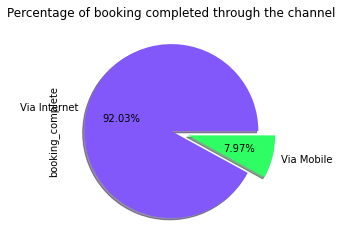

In [17]:
# Count plot to show the booking complete through mobile and internet

data.groupby('sales_channel')['booking_complete'].sum().plot(kind='pie',
                                                             explode = [0,0.2],
                                                             labels=['Via Internet', 'Via Mobile'],
                                                             colors=['#8258fa', '#2efe64'], autopct = "%1.2f%%", shadow=True)
plt.title("Percentage of booking completed through the channel")
plt.show()

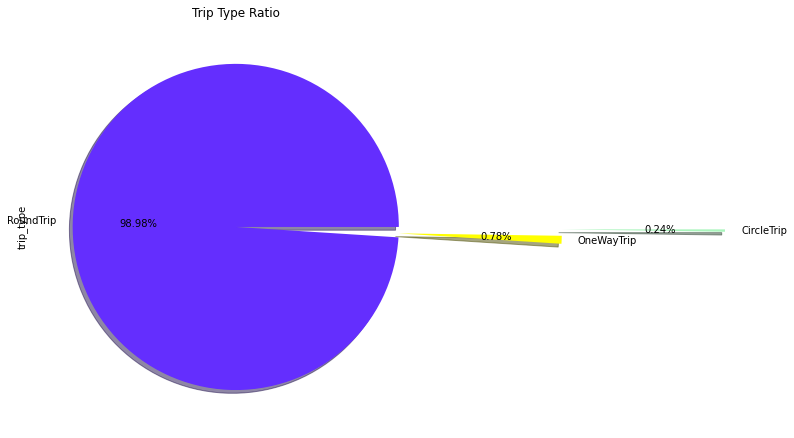

In [18]:
# Pie chart to visualise percentage of people interested in different trip types

plt.figure(figsize=(7.5,7.5))
trip_type = ['trip_type']

for i, col in enumerate(trip_type):
    data[col].value_counts().plot(kind='pie', explode=[0,1,2], labels = ['RoundTrip', 'OneWayTrip','CircleTrip'], 
                                             colors = ["#642efe", "#ffff00", '#a9f5bc'], autopct = "%1.2f%%", shadow=True)
plt.title("Trip Type Ratio")
plt.show()

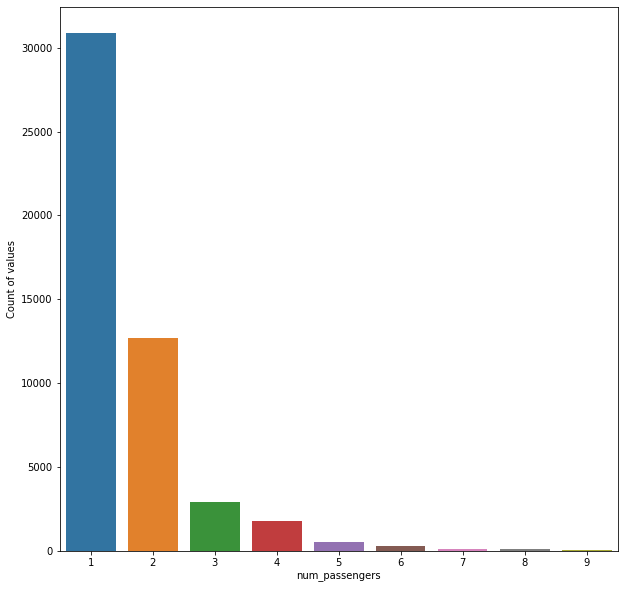

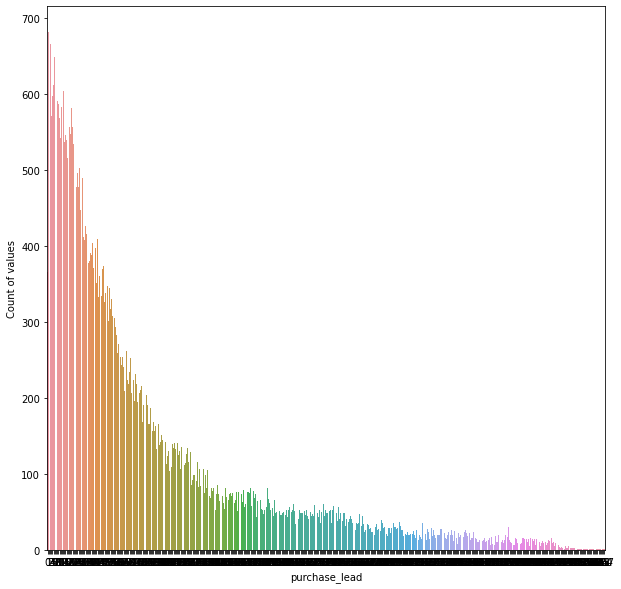

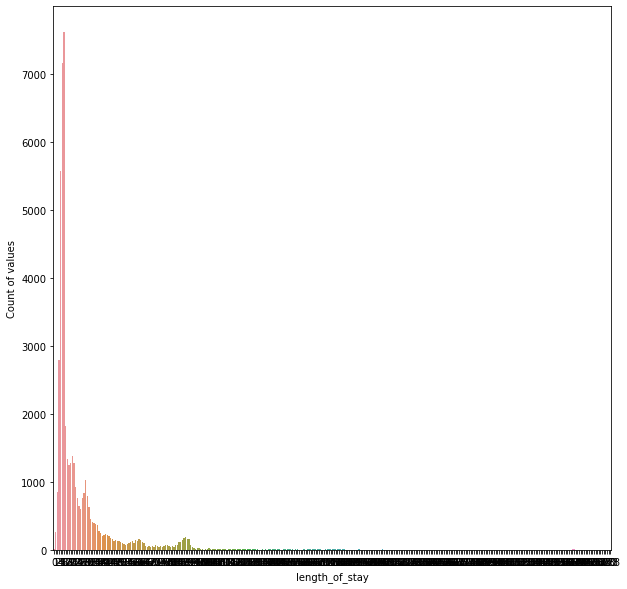

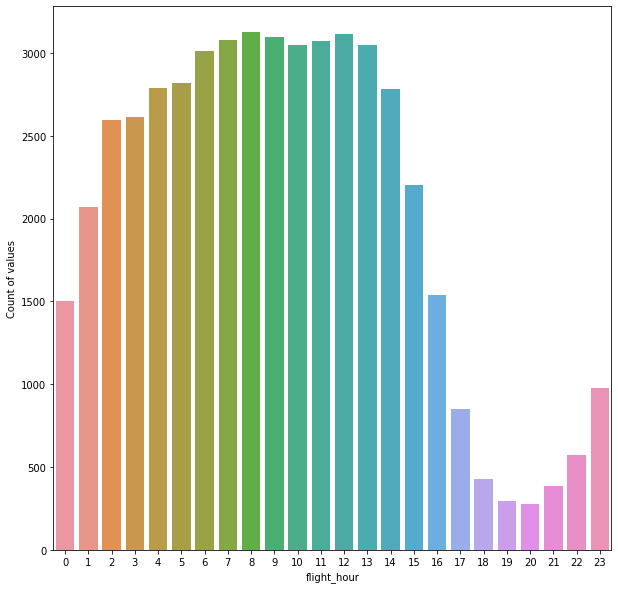

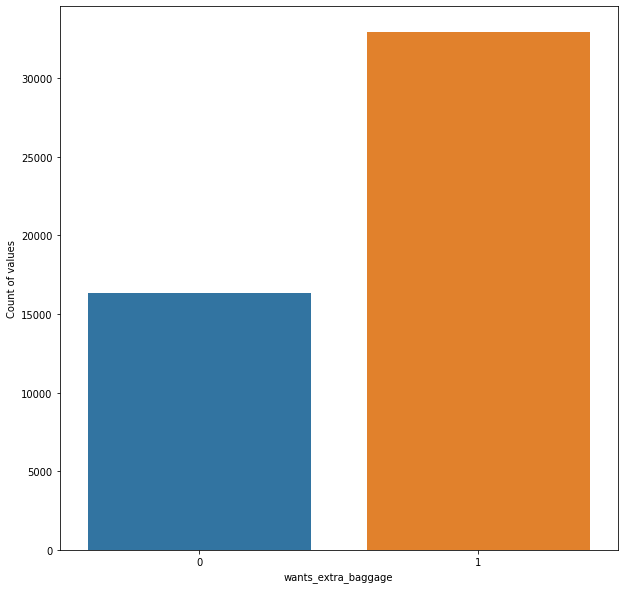

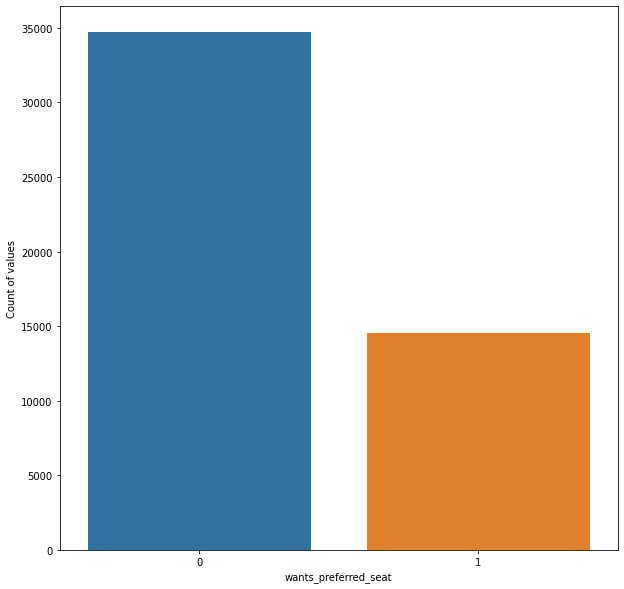

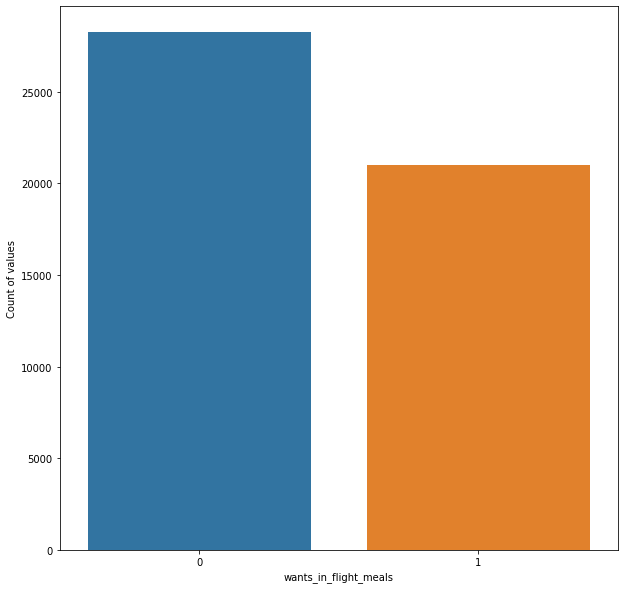

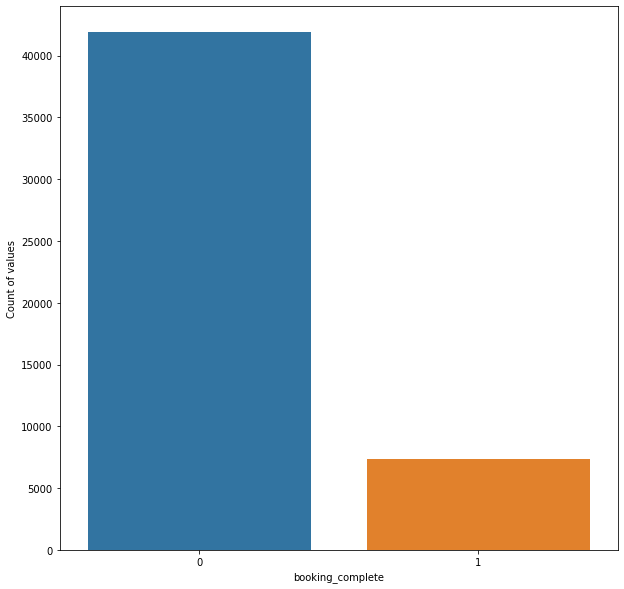

In [19]:
# Count Plot to understand the Num of passengers who are travelled with each booking

for i in data.select_dtypes(include='int'):
    plt.figure(figsize=(10,10))
    sns.countplot(data = data, x=data[i])
    plt.xlabel(f'{i}')
    plt.ylabel('Count of values')
    plt.show()

In [20]:
pd.pivot_table(data, index='booking_origin', columns='flight_day', values='booking_complete').style.background_gradient(cmap='icefire')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
booking_origin,,,,,,,
(not set),0.272727,0.000000,1.000000,0.166667,0.076923,0.076923,0.428571
Afghanistan,nan,nan,nan,nan,0.000000,nan,nan
Algeria,nan,nan,nan,nan,0.000000,nan,nan
Argentina,nan,0.000000,nan,nan,0.000000,0.000000,0.000000
Australia,0.043275,0.050264,0.053197,0.049311,0.054953,0.049869,0.052612
Austria,0.000000,0.000000,nan,0.000000,0.000000,nan,0.000000
Bahrain,nan,nan,0.500000,nan,0.666667,nan,nan
Bangladesh,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000
Belarus,0.000000,nan,nan,nan,nan,nan,nan


### MACHINE LEARNING MODELING

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [22]:
# Convert the categorical data into the numerical using the labelencoder

for col in data.select_dtypes(include='object').columns:
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])

In [23]:
# Divided the data into independent and dependent variables

x = data.drop(['booking_complete', 'purchase_lead', 'route'], axis=1)
y = data['booking_complete']

# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, train_size = 0.8)

In [24]:
def model_building(model, X_train, X_test, y_train, y_test):
    print(f'Name of the model - {model}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f'\nThe Accuracy score is {score*100:.2f}')
    #print(f'\n{classification_report(y_test, y_pred)}')
    #print(f'\n{confusion_matrix(y_test, y_pred)}')
    print('_____'*15)

# Create a dictionary of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Neighbors': KNeighborsClassifier(),
    'XGB': XGBClassifier(),
    'Cat': CatBoostClassifier(iterations=1)
}

for i in range(len(models)):
    model = list(models.values())[i]
    name = list(models.keys())[i]
    model_building(model, X_train, X_test, y_train, y_test)

Name of the model - LogisticRegression()

The Accuracy score is 84.62
___________________________________________________________________________
Name of the model - DecisionTreeClassifier()

The Accuracy score is 76.54
___________________________________________________________________________
Name of the model - RandomForestClassifier()

The Accuracy score is 83.68
___________________________________________________________________________
Name of the model - KNeighborsClassifier()

The Accuracy score is 82.94
___________________________________________________________________________
Name of the model - XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None